# Bibliotekos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Duomenų importavimas / tvarkymas

In [ ]:
df = pd.read_csv('NYC_Collisions.csv')
pd.concat([df.head(), df.tail()])

,Collision ID,Date,Time,Borough,Street Name,Cross Street,Latitude,Longitude,Contributing Factor,Vehicle Type,Persons Injured,Persons Killed,Pedestrians Injured,Pedestrians Killed,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed
0,4491746,2021-01-01,20:00:00,Bronx,Bruckner Expressway,NaN,40.833980,-73.826350,Pavement Slippery,Passenger Vehicle,0.0,0,0,0,0,0,0,0
1,4441905,2021-01-01,05:28:00,Brooklyn,Lafayette Avenue,NaN,40.687300,-73.973656,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0
2,4382769,2021-01-01,06:00:00,Staten Island,West Shore Expressway,NaN,NaN,NaN,Fell Asleep,Passenger Vehicle,0.0,0,0,0,0,0,0,0
3,4380949,2021-01-01,19:30:00,Bronx,Sedgwick Avenue,Vancortlandt Avenue West,40.882700,-73.892730,NaN,Not Reported,0.0,0,0,0,0,0,0,0
4,4380940,2021-01-01,07:40:00,Brooklyn,Cortelyou Road,Mc Donald Avenue,40.637910,-73.978640,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0
238416,4619581,2023-04-09,04:21:00,Brooklyn,Meeker Avenue,NaN,40.715443,-73.951850,Failure to Yield Right-of-Way,Not Reported,1.0,0,1,0,0,0,0,0
238417,4619685,2023-04-09,08:30:00,Queens,Elbertson Street,Elmhurst Avenue,40.746864,-73.877170,Backing Unsafely,Passenger Vehicle,1.0,0,1,0,0,0,0,0
238418,4619519,2023-04-09,21:19:00,Brooklyn,Cortelyou Road,East 17 Street,40.642017,-73.962660,Unspecified,Passenger Vehicle,1.0,0,1,0,0,0,0,0
238419,4619921,2023-04-09,11:00:00,Manhattan,West 50 Street,NaN,40.763790,-73.989655,Driver Inattention/Distraction,Transport,0.0,0,0,0,0,0,0,0
238420,4619618,2023-04-09,19:10:00,Bronx,Watson Avenue,Manor Avenue,40.826400,-73.875810,Driver Inattention/Distraction,Passenger Vehicle,0.0,0,0,0,0,0,0,0


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time
df.head()

,Collision ID,Date,Time,Borough,Street Name,Cross Street,Latitude,Longitude,Contributing Factor,Vehicle Type,Persons Injured,Persons Killed,Pedestrians Injured,Pedestrians Killed,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed
0,4491746,2021-01-01,20:00:00,Bronx,Bruckner Expressway,NaN,40.83398,-73.826350,Pavement Slippery,Passenger Vehicle,0.0,0,0,0,0,0,0,0
1,4441905,2021-01-01,05:28:00,Brooklyn,Lafayette Avenue,NaN,40.68730,-73.973656,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0
2,4382769,2021-01-01,06:00:00,Staten Island,West Shore Expressway,NaN,NaN,NaN,Fell Asleep,Passenger Vehicle,0.0,0,0,0,0,0,0,0
3,4380949,2021-01-01,19:30:00,Bronx,Sedgwick Avenue,Vancortlandt Avenue West,40.88270,-73.892730,NaN,Not Reported,0.0,0,0,0,0,0,0,0
4,4380940,2021-01-01,07:40:00,Brooklyn,Cortelyou Road,Mc Donald Avenue,40.63791,-73.978640,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0


# Klausimas nr. 1
Kokiu metų laiku pasitaiko daugiausia avarijų?

Kokiu dienos metu pasitaiko daugiausia avarijų?

Kurie metai buvo avaringiausi?


In [ ]:
# susikuriu naują stulpelį sezonams nustatyti
df['month'] = df['Date'].dt.month

def what_season(eilute):
    if eilute['month'] == 1 or eilute['month'] == 2 or eilute['month'] == 12:
        return 'winter'
    elif eilute['month'] == 3 or eilute['month'] == 4 or eilute['month'] == 5:
        return 'spring'
    elif eilute['month'] == 6 or eilute['month'] == 7 or eilute['month'] == 8:
        return 'summer'
    else:
        return 'autumn'

df['season'] = df.apply(what_season, axis=1)
df.head()

,Collision ID,Date,Time,Borough,Street Name,Cross Street,Latitude,Longitude,Contributing Factor,Vehicle Type,Persons Injured,Persons Killed,Pedestrians Injured,Pedestrians Killed,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed,month,season
0,4491746,2021-01-01,20:00:00,Bronx,Bruckner Expressway,NaN,40.83398,-73.826350,Pavement Slippery,Passenger Vehicle,0.0,0,0,0,0,0,0,0,1,winter
1,4441905,2021-01-01,05:28:00,Brooklyn,Lafayette Avenue,NaN,40.68730,-73.973656,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0,1,winter
2,4382769,2021-01-01,06:00:00,Staten Island,West Shore Expressway,NaN,NaN,NaN,Fell Asleep,Passenger Vehicle,0.0,0,0,0,0,0,0,0,1,winter
3,4380949,2021-01-01,19:30:00,Bronx,Sedgwick Avenue,Vancortlandt Avenue West,40.88270,-73.892730,NaN,Not Reported,0.0,0,0,0,0,0,0,0,1,winter
4,4380940,2021-01-01,07:40:00,Brooklyn,Cortelyou Road,Mc Donald Avenue,40.63791,-73.978640,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0,1,winter


In [ ]:
# sugrupuoju, kiek atsitikimų įvyko kiekvieną sezoną
accidents_per_season = df.groupby('season').size().sort_values(ascending=False)
accidents_per_season



,0
season,
spring,64028
winter,61179
summer,57752
autumn,55462


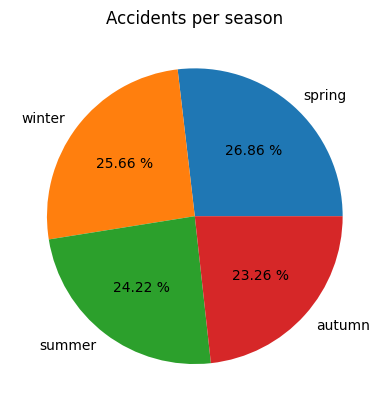

In [ ]:
# grafikas, procentiniam atsitikimų pasiskirstymui per sezonus atvaizduoti

plt.pie(accidents_per_season, labels=accidents_per_season.keys(), autopct='%.2f %%')

plt.title('Accidents per season')
plt.show()

In [ ]:
# susikuriu naują stulpelį dienos laikui nustatyti

def what_time_day(eilute):
    time = eilute['Time']
    if time < pd.to_datetime('05:00:00', format='%H:%M:%S').time() or time >= pd.to_datetime('23:00:00', format='%H:%M:%S').time():
        return 'night'
    elif time < pd.to_datetime('10:00:00', format='%H:%M:%S').time():
        return 'morning'
    elif time < pd.to_datetime('18:00:00', format='%H:%M:%S').time():
        return 'day'
    else:
        return 'evening'

df['time_day'] = df.apply(what_time_day, axis=1)
df.head()

,Collision ID,Date,Time,Borough,Street Name,Cross Street,Latitude,Longitude,Contributing Factor,Vehicle Type,...,Persons Killed,Pedestrians Injured,Pedestrians Killed,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed,month,season,time_day
0,4491746,2021-01-01,20:00:00,Bronx,Bruckner Expressway,NaN,40.83398,-73.826350,Pavement Slippery,Passenger Vehicle,...,0,0,0,0,0,0,0,1,winter,evening
1,4441905,2021-01-01,05:28:00,Brooklyn,Lafayette Avenue,NaN,40.68730,-73.973656,Unspecified,Passenger Vehicle,...,0,0,0,0,0,0,0,1,winter,morning
2,4382769,2021-01-01,06:00:00,Staten Island,West Shore Expressway,NaN,NaN,NaN,Fell Asleep,Passenger Vehicle,...,0,0,0,0,0,0,0,1,winter,morning
3,4380949,2021-01-01,19:30:00,Bronx,Sedgwick Avenue,Vancortlandt Avenue West,40.88270,-73.892730,NaN,Not Reported,...,0,0,0,0,0,0,0,1,winter,evening
4,4380940,2021-01-01,07:40:00,Brooklyn,Cortelyou Road,Mc Donald Avenue,40.63791,-73.978640,Unspecified,Passenger Vehicle,...,0,0,0,0,0,0,0,1,winter,morning


In [ ]:
# sugrupuoju, kiek atsitikimų įvyko kokiu dienos laiku
accidents_time_of_day = df.groupby('time_day').size().sort_values(ascending=False)
accidents_time_of_day

,0
time_day,
day,104105
evening,53909
morning,42091
night,38316


Text(0.5, 1.0, 'Accidents per time of day')

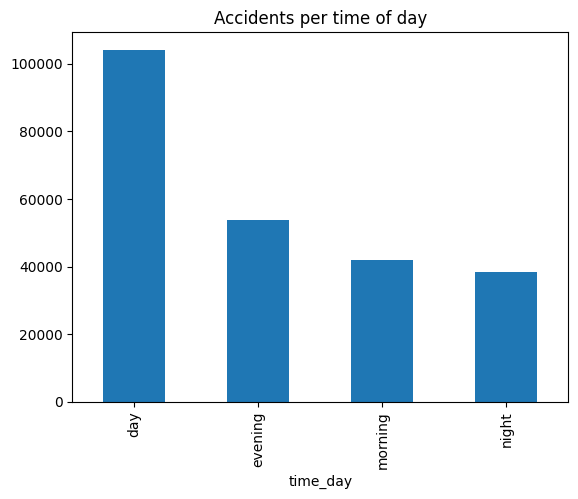

In [ ]:
accidents_time_of_day.plot(kind='bar')
plt.title('Accidents per time of day')

In [ ]:
# Avaringumas pagal dienos metą priklausomai nuo valandų skaičiaus
morning = 5 # Rytas - 5 valandos
day = 8 # Diena - 8 valandos
evening = 5 # Vakaras - 5 valandos
night = 6 # Naktis - 6 valandos


relative_to_morning = accidents_time_of_day['morning'] / morning
relative_to_day = accidents_time_of_day['day'] / day
relative_to_evening = accidents_time_of_day['evening'] / evening
relative_to_night = accidents_time_of_day['night'] / night


df_accidents = pd.DataFrame({
    'time_of_day': ['morning', 'day', 'evening', 'night'],
    'relative_value': [relative_to_morning, relative_to_day, relative_to_evening, relative_to_night]
})
df_accidents = df_accidents.sort_values(by='relative_value', ascending=False)

df_accidents


,time_of_day,relative_value
1,day,13013.125
2,evening,10781.800
0,morning,8418.200
3,night,6386.000


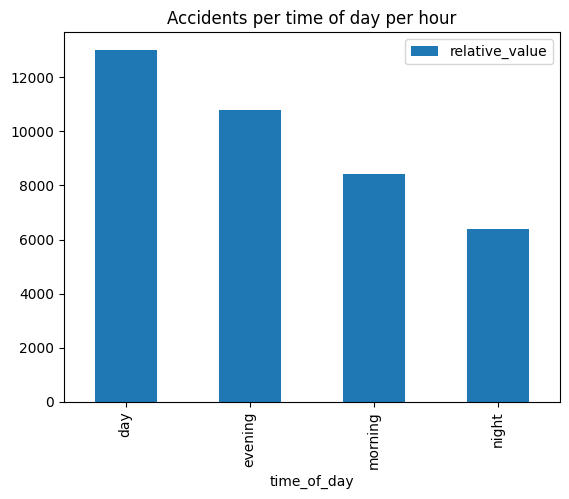

In [ ]:
df_accidents.plot(kind='bar', x='time_of_day', y='relative_value')
plt.title('Accidents per time of day per hour')
plt.show()

# Klausimas nr. 2
Kokios transporto priemonės patena į avarijas dažniausiai?

In [ ]:
top_10_vehicle_types = df.groupby('Vehicle Type').size().sort_values(ascending=False).head(7)
top_10_vehicle_types_filtered = top_10_vehicle_types.drop('Passenger Vehicle').drop('Not Reported')

print(top_10_vehicle_types_filtered)


Vehicle Type
Transport    6642
Taxi         6015
Bicycle      5533
Bus          4197
Scooter      2137
dtype: int64


# Klausimas nr. 3

Kuriame rajone buvo daugiausia aukų?

Kuriame rajone įvyko daugiausia įvykių?

In [ ]:
borough_accidents = df.groupby('Borough').size()

max_accidents = borough_accidents.max()
index_max = borough_accidents[borough_accidents == max_accidents].index[0]

min_accidents = borough_accidents.min()
index_min = borough_accidents[borough_accidents == min_accidents].index[0]

print(f'Most accidents happened in {index_max}: {max_accidents} accidents')
print(f'Least accidents happened in {index_min}: {min_accidents} accidents')

Most accidents happened in Brooklyn: 76416 accidents
Least accidents happened in Staten Island: 11568 accidents


In [ ]:
# Suskaičiuoju, kiek išvis žmonių, pėsiųjų, dviratininkų ir automobilininkų žuvo avarijose

counts_p = df['Persons Killed'].value_counts()
counts_pe = df['Pedestrians Killed'].value_counts()
counts_c = df['Cyclists Killed'].value_counts()
counts_m = df['Motorists Killed'].value_counts()


count_of_persons= counts_p.get(1, 0)
count_of_pedestrians= counts_pe.get(1, 0)
count_of_cyclists= counts_c.get(1, 0)
count_of_motorists= counts_m.get(1, 0)

print(f'Persons killed in total: {count_of_persons} people.')
print(f'Pedestrians killed in total: {count_of_pedestrians} people.')
print(f'Cyclists killed in total: {count_of_cyclists} people.')
print(f'Motorists killed in total: {count_of_motorists} people.')

Persons killed in total: 594 people.
Pedestrians killed in total: 282 people.
Cyclists killed in total: 47 people.
Motorists killed in total: 235 people.


In [ ]:
# Skaičiuoju procentines išraiškas pėsčiųjų, dviratininkų ir automobilininkų

print(f'Pedestrians were {round(count_of_pedestrians / count_of_persons * 100)}% of all accidents.')
print(f'Cyclists were {round(count_of_cyclists / count_of_persons * 100)}% of all accidents.')
print(f'Motorists were {round(count_of_motorists / count_of_persons * 100)}% of all accidents.')

Pedestrians were 47% of all accidents.
Cyclists were 8% of all accidents.
Motorists were 40% of all accidents.


In [ ]:
# Pasižiūriu, kokie yra skirtingi rajonai
df['Borough'].unique()

array(['Bronx', 'Brooklyn', 'Staten Island', 'Manhattan', 'Queens', nan],
      dtype=object)

In [ ]:
# Suskaičiuoju, kiek skirtinguose rajonuose buvo aukų
filtered_persons_killed = df[df['Persons Killed'] == 1]
persons_killed_per_borough = filtered_persons_killed.groupby('Borough').size().sort_values(ascending=False)

filtered_pedestrians_killed = df[df['Pedestrians Killed'] == 1]
pedestrians_killed_per_borough = filtered_pedestrians_killed.groupby('Borough').size().sort_values(ascending=False)

filtered_cyclists_killed = df[df['Cyclists Killed'] == 1]
cyclists_killed_per_borough = filtered_cyclists_killed.groupby('Borough').size().sort_values(ascending=False)

filtered_motorists_killed = df[df['Motorists Killed'] == 1]
motorists_killed_per_borough = filtered_motorists_killed.groupby('Borough').size().sort_values(ascending=False)


print(f'Persons killed  per borough: {persons_killed_per_borough}\n')
print(f'Pedestrians killed  per borough: {pedestrians_killed_per_borough}\n')
print(f'Cyclists killed  per borough: {cyclists_killed_per_borough}\n')
print(f'Motorists killed  per borough: {motorists_killed_per_borough}')

Persons killed  per borough: Borough
Brooklyn         177
Queens           152
Bronx            116
Manhattan         96
Staten Island     32
dtype: int64

Pedestrians killed  per borough: Borough
Brooklyn         97
Queens           67
Manhattan        55
Bronx            41
Staten Island    14
dtype: int64

Cyclists killed  per borough: Borough
Brooklyn         12
Bronx            11
Manhattan        11
Queens            9
Staten Island     1
dtype: int64

Motorists killed  per borough: Borough
Queens           73
Brooklyn         55
Bronx            54
Manhattan        27
Staten Island    16
dtype: int64


# Klausimas nr. 4
Kokios avarijų priežastys yra dažniausiai pasitaikančios?


In [ ]:
 # Kokios avarijų priežastys yra dažniausiai pasitaikančios

df.groupby('Contributing Factor').size().sort_values(ascending=False).drop('Unspecified').head()



,0
Contributing Factor,
Driver Inattention/Distraction,58308
Failure to Yield Right-of-Way,16555
Following Too Closely,15519
Passing or Lane Usage Improper,10733
Passing Too Closely,9132


In [ ]:
# Kokios priežastys dažniausios mirtingiausiose avarijose

filtered_persons_killed = df[df['Persons Killed'] == 1]
persons_killed_per_contributing_factor = filtered_persons_killed.groupby('Contributing Factor').size().sort_values(ascending=False).head(6)
persons_killed_per_contributing_factor_filtered = persons_killed_per_contributing_factor.drop('Unspecified')
print(f'Persons killed per contributing factor: {persons_killed_per_contributing_factor_filtered}')

Persons killed per contributing factor: Contributing Factor
Unsafe Speed                                             118
Driver Inattention/Distraction                            74
Failure to Yield Right-of-Way                             46
Traffic Control Disregarded                               31
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion     27
dtype: int64


# Klausimas nr. 5
Kaip keitėsi avaringumas bėgant metams?


In [ ]:
df.head()

,Collision ID,Date,Time,Borough,Street Name,Cross Street,Latitude,Longitude,Contributing Factor,Vehicle Type,...,Pedestrians Injured,Pedestrians Killed,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed,Year,month,season,time_day
0,4491746,2021-01-01,20:00:00,Bronx,Bruckner Expressway,NaN,40.83398,-73.826350,Pavement Slippery,Passenger Vehicle,...,0,0,0,0,0,0,2021,1,winter,evening
1,4441905,2021-01-01,05:28:00,Brooklyn,Lafayette Avenue,NaN,40.68730,-73.973656,Unspecified,Passenger Vehicle,...,0,0,0,0,0,0,2021,1,winter,morning
2,4382769,2021-01-01,06:00:00,Staten Island,West Shore Expressway,NaN,NaN,NaN,Fell Asleep,Passenger Vehicle,...,0,0,0,0,0,0,2021,1,winter,morning
3,4380949,2021-01-01,19:30:00,Bronx,Sedgwick Avenue,Vancortlandt Avenue West,40.88270,-73.892730,NaN,Not Reported,...,0,0,0,0,0,0,2021,1,winter,evening
4,4380940,2021-01-01,07:40:00,Brooklyn,Cortelyou Road,Mc Donald Avenue,40.63791,-73.978640,Unspecified,Passenger Vehicle,...,0,0,0,0,0,0,2021,1,winter,morning


In [ ]:
# Kurie metai buvo avaringiausi?

year_count = df['Year'].value_counts().sort_values(ascending=False)

year_count

,count
Year,
2021,110546
2022,103780
2023,24095


In [ ]:
# Kurie metai buvo avaringiausi procentaliai?
year_count_percent = round((year_count / year_count.sum()) * 100)
year_count_percent


,count
Year,
2021,46.0
2022,44.0
2023,10.0


In [ ]:
# Kurie metai pareikalavo daugiausia aukų
killed_by_year = df.groupby('Year')['Persons Killed'].sum()
killed_by_year

,Persons Killed
Year,
2021,294
2022,285
2023,56


In [ ]:
# Kurie metai pareikalavo daugiausia aukų procentaliai
killed_by_year_percent = round((killed_by_year / killed_by_year.sum()) * 100)
killed_by_year_percent

,Persons Killed
Year,
2021,46.0
2022,45.0
2023,9.0


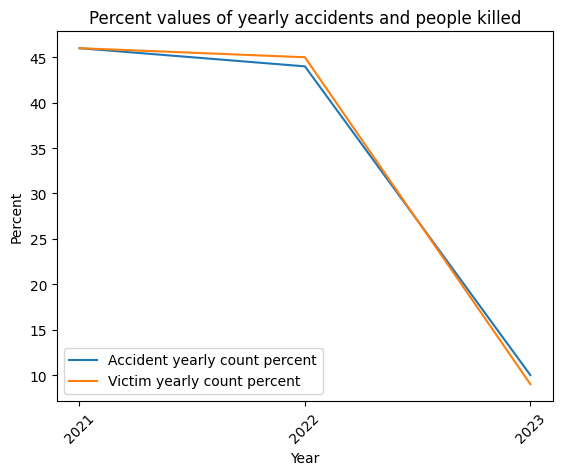

In [ ]:
# Grafikas parodyti, kaip procentaliai keitėsi aukų ir avarijų skaičius
x_axis = year_count_percent.index
y_axis = year_count_percent.values
x_axis1 = killed_by_year_percent.index
y_axis1 = killed_by_year_percent.values


plt.xticks(ticks=x_axis, labels=x_axis, rotation=45)
plt.plot(x_axis, y_axis,label='Accident yearly count percent')
plt.plot(x_axis1, y_axis1,label='Victim yearly count percent')
plt.xlabel('Year')
plt.ylabel('Percent')
plt.title('Percent values of yearly accidents and people killed')
plt.legend()
plt.show()

# Galutinės išvados
Daugiausia avarijų New York'e įkyksta pavasariais, nors skirtumas nuo kitų metų laikų nėra labai akivaizdus, pasiskirstymas yra ganėtinai panašus.

Dienos metas yra pats avaringiausias, po to seka vakaras, rytas ir naktis, šie rezultatai priklauso nuo transporto bei žmonių kiekius gatvėse.

Dažniausiai į avarijas patenka automobiliai, netoli seka taxi, tada dviračiai, autobusai ir paspirtukai.
Avaringiausias rajonas yra Brooklin'as, o mažiausiai avaringas - Staten Island, skirtumas žymus, per 60000 mažiau avarijų.

Dažniausiai žūstantys autoavarijose yra pėstieji, tačiau nedaug mažiau žūsta ir automobilininkų, skirtumas vos 7%.

Brooklin'as pirmą vietą nukentėlusiųjų sąraše užleidžia tik automobilininkų statistokoje, na o Staten Island visose aukų statistikose yra paskutiniai.

Dažniausiai pasitaikanti avarijos priežastis yra vairuotojo aplaidumas, dėmesio nesutelkimas, na o vėliau nemokėjimas sukti į dešinę, nemokėjimas rikiuotis ar nesilaikymas saugaus atstumo. Na o kalbant apie mirtingiausių avarijų priežastis matome, kad mirtingiausių avarijų priežastis yra nesaugaus greičio pasirinkimas.

Bėgant metams tiek avarijų, tiek aukų skaičius krenta, matome, kaip vienas su kitu susiję ir krenta proporcingai vienas kitam.

